In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

In [5]:
dataset=pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [6]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
df=dataset

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [9]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<AxesSubplot:xlabel='Date'>

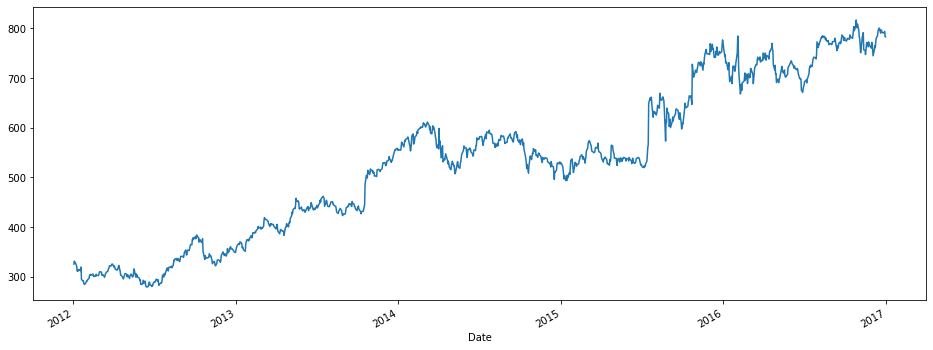

In [12]:
df['Open'].plot(figsize=(16,6))

In [13]:
df["Close"] = df["Close"].str.replace(',', '').astype(float)

In [14]:
df["Volume"] = df["Volume"].str.replace(',', '').astype(float)

In [15]:
# 7 days rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


In [16]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
#dataset with scaled value
training_set_scaled = sc.fit_transform(training_set)

In [18]:
#creating a data structure with 60 timesteps and 1 output
X_train = [] 
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])  #60 previous stock price from i
    y_train.append(training_set_scaled[i, 0])
    
# make them numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
    
    
print("X_TRAIN " ,X_train)
print("Y_TRAIN " ,y_train)

X_TRAIN  [[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
Y_TRAIN  [0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [19]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
#Building RNN
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.layers import Dropout

In [21]:
#initialize RNN
model = Sequential()

#adding First LSTM LAYER AND SOME DROPOUT REgularisation
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
#dropout 20% of neuron during each epoch of traiing
model.add(Dropout(0.2))

#adding Second LSTM Layer with dropout Regularisation
model.add(LSTM(units = 50, return_sequences=True)) #in next layers we dont need input shape
model.add(Dropout(0.2))

#adding Third LSTM Layer
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

#adding Fourth LSTM Layer  --> return seq == False(no more layers now)
model.add(LSTM(units = 50, return_sequences=False))
model.add(Dropout(0.2))

#adding output layer
model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)               

In [25]:
#Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#fitting the RNN to traiing set
model.fit(X_train, y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 58ms/step - loss: 0.0407
Epoch 2/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0045
Epoch 13/100
38/38 [=====

In [27]:
#Predicting and Visualising Result
data_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = data_test.iloc[:,1:2].values
print(data_test.head())

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


In [30]:
data_train = df
data_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [31]:
#Predicting Stock Price of 2017
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis=0)
inputs =  dataset_total[len(dataset_total) - len(data_test) -60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = [] 

for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])      

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

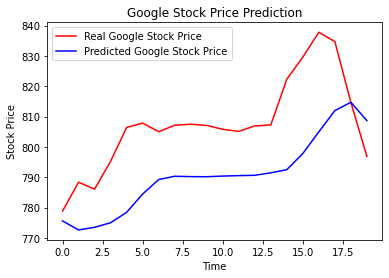

In [32]:
#Visualising the Result
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()